In [174]:
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [175]:
import numpy as np
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist

In [176]:
from keras.utils import plot_model

In [177]:
from keras.utils import to_categorical

In [178]:
import pandas as pd

In [249]:
from sklearn.metrics import confusion_matrix
import itertools

In [179]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

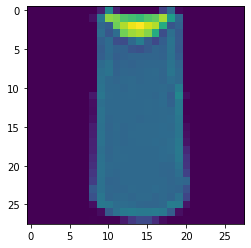

In [180]:
plt.imshow(train_images[2,:,:])
plt.show()

In [181]:
print(train_images.shape) # (60000, 28, 28)
print(test_images.shape)  # (10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


In [182]:
# Normalize the images.
train_images = (train_images / 127) - 1
test_images = (test_images / 127) - 1

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [183]:
train_images.min(), train_images.max()

(-1.0, 1.0078740157480315)

In [184]:
test_images.min(), test_images.max()

(-1.0, 1.0078740157480315)

## 1. Опишите - какой результат получен в нейросети в зависимости от:

        a. числа нейронов в слое(для 2-хслойной сети)

In [185]:
df = pd.DataFrame(columns=['no. neurons', 'train accuracy', 'val_accuracy'])

In [186]:

for n_neurons in range(1,500,40):
# Build the model.
    model = Sequential([
    Dense(n_neurons, activation='tanh', input_shape=(784,)),
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

# Compile the model.
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

    y_t = to_categorical(train_labels)
    y_tt = to_categorical(test_labels)

    # Train the model.
    history= model.fit(  
      train_images[:,:],
      y_t[:,:],
      epochs=5,
      batch_size=32, validation_split=0.2
      )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    
    df = df.append({'no. neurons': n_neurons, 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.0796 - accuracy: 0.1830 - val_loss: 1.9244 - val_accuracy: 0.2017
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 1.9170 - accuracy: 0.2045 - val_loss: 1.9150 - val_accuracy: 0.2025
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 1.8819 - accuracy: 0.2139 - val_loss: 1.8622 - val_accuracy: 0.2237
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 1.8569 - accuracy: 0.2292 - val_loss: 1.8497 - val_accuracy: 0.2356
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 1.8389 - accuracy: 0.2282 - val_loss: 1.8167 - val_accuracy: 0.2298
Epoch 1/5
1500/1500 [==============================] - 6s 2ms/step - loss: 0.6952 - accuracy: 0.7614 - val_loss: 0.4709 - val_accuracy: 0.8270
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4146 - accuracy: 0.8531 - val_loss: 0.4056 - val_accuracy: 0.8528

In [187]:
df

,no. neurons,train accuracy,val_accuracy
0,1.0,0.229667,0.229750
1,41.0,0.877167,0.863000
2,81.0,0.878875,0.870083
3,121.0,0.879792,0.874583
4,161.0,0.880250,0.867500
5,201.0,0.879687,0.861000
6,241.0,0.880854,0.860667
7,281.0,0.880125,0.863750
8,321.0,0.879438,0.865083
9,361.0,0.877292,0.868000


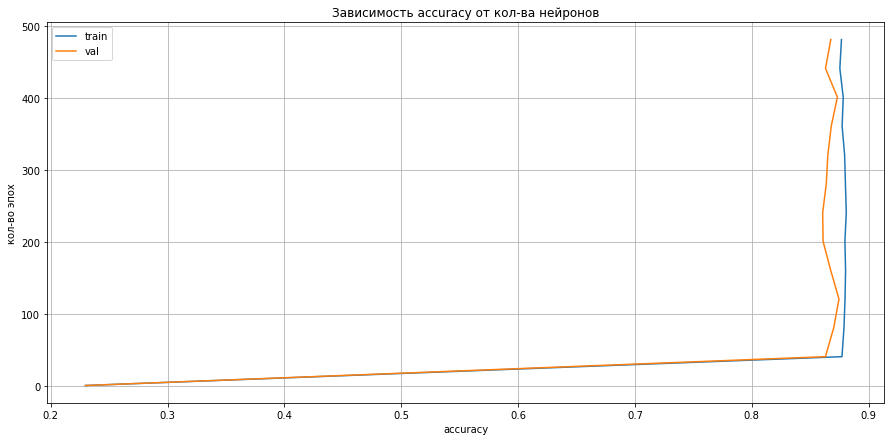

In [188]:
plt.figure(figsize=(15,7))
plt.plot(df['train accuracy'], df['no. neurons'], label='train')
plt.plot(df['val_accuracy'], df['no. neurons'], label='val')
plt.title('Зависимость accuracy от кол-ва нейронов')
plt.xlabel('accuracy')
plt.ylabel('кол-во эпох')
plt.grid('On')
plt.legend();

**Вывод:
    При увеличении количества нейронов показатель accuracy растет. 
    После кол-ва нейронов 161 показатель accuracy немного падает. Недостатоно данных для такого количства нейронов.**

Посмотрим из чего она состоит:

In [189]:
model.summary()

Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 481)               377585    
_________________________________________________________________
dense_189 (Dense)            (None, 10)                4820      
Total params: 382,405
Trainable params: 382,405
Non-trainable params: 0
_________________________________________________________________


Выводим картинку со схемой модели

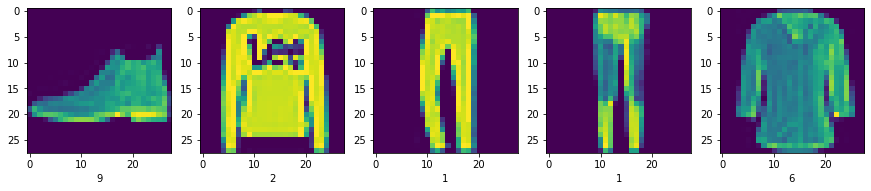

In [190]:
N = 5
y_pred = model.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

In [191]:
y_pred_class

array([9, 2, 1, 1, 6], dtype=int64)

## б. числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).

In [221]:
df_1b = pd.DataFrame(columns=['no. layers', 'no. neurons', 'train accuracy', 'val_accuracy'])

**2-x слойная модель, число нейронов: 64, 128, 192**

In [222]:
for n_neurons in range(64, 193, 64):
# Build the model.
    model = Sequential([
    Dense(n_neurons, activation='tanh', input_shape=(784,)),
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])
    
    no_layers = 2

# Compile the model.
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

    y_t = to_categorical(train_labels)
    y_tt = to_categorical(test_labels)

    # Train the model.
    history= model.fit(  
      train_images[:,:],
      y_t[:,:],
      epochs=5,
      batch_size=32, validation_split=0.2
      )
    
    train_acc_1b = history.history['accuracy'][-1]
    val_acc_1b = history.history['val_accuracy'][-1]

    
    df_1b = df_1b.append({'no. layers': no_layers, 'no. neurons': n_neurons, 'train accuracy': train_acc_1b, 'val_accuracy': val_acc_1b}, ignore_index=True)
    

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6275 - accuracy: 0.7804 - val_loss: 0.4221 - val_accuracy: 0.8469
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4062 - accuracy: 0.8528 - val_loss: 0.3928 - val_accuracy: 0.8593
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3687 - accuracy: 0.8680 - val_loss: 0.3813 - val_accuracy: 0.8608
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3442 - accuracy: 0.8755 - val_loss: 0.3747 - val_accuracy: 0.8672
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3291 - accuracy: 0.8812 - val_loss: 0.3662 - val_accuracy: 0.8679
Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6002 - accuracy: 0.7862 - val_loss: 0.4296 - val_accuracy: 0.8464
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3980 - accuracy: 0.8547 - val_loss: 0.3876 - val_accuracy: 0.8627

**3-x слойная модель, число нейронов: 64, 128, 192**

In [224]:
for n_neurons in range(64, 193, 64):
# Build the model.
    model = Sequential([
    Dense(n_neurons, activation='tanh', input_shape=(784,)),
    Dense(n_neurons, activation='tanh'),   
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    no_layers = 3
# Compile the model.
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

    y_t = to_categorical(train_labels)
    y_tt = to_categorical(test_labels)

    # Train the model.
    history= model.fit(  
      train_images[:,:],
      y_t[:,:],
      epochs=5,
      batch_size=32, validation_split=0.2
      )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    
    df_1b = df_1b.append({'no. layers': no_layers, 'no. neurons': n_neurons, 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)
    

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6486 - accuracy: 0.7761 - val_loss: 0.4164 - val_accuracy: 0.8493
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4079 - accuracy: 0.8516 - val_loss: 0.3980 - val_accuracy: 0.8545
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3632 - accuracy: 0.8671 - val_loss: 0.3762 - val_accuracy: 0.8637
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3435 - accuracy: 0.8730 - val_loss: 0.3724 - val_accuracy: 0.8633
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3280 - accuracy: 0.8807 - val_loss: 0.3561 - val_accuracy: 0.8691
Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6071 - accuracy: 0.7831 - val_loss: 0.4234 - val_accuracy: 0.8472
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4002 - accuracy: 0.8518 - val_loss: 0.3747 - val_accuracy: 0.8648

**5-ти слойная модель, число нейронов: 64, 128, 192**

In [225]:
for n_neurons in range(64, 193, 64):
# Build the model.
    model = Sequential([
    Dense(n_neurons, activation='tanh', input_shape=(784,)),
    Dense(n_neurons, activation='tanh'),  
    Dense(n_neurons, activation='tanh'),    
    Dense(n_neurons, activation='tanh'),   
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    no_layers = 5
# Compile the model.
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

    y_t = to_categorical(train_labels)
    y_tt = to_categorical(test_labels)

    # Train the model.
    history= model.fit(  
      train_images[:,:],
      y_t[:,:],
      epochs=5,
      batch_size=32, validation_split=0.2
      )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    
    df_1b = df_1b.append({'no. layers': no_layers, 'no. neurons': n_neurons, 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)
    

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6670 - accuracy: 0.7695 - val_loss: 0.4327 - val_accuracy: 0.8422
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4180 - accuracy: 0.8485 - val_loss: 0.4000 - val_accuracy: 0.8502
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3823 - accuracy: 0.8599 - val_loss: 0.4002 - val_accuracy: 0.8524
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3610 - accuracy: 0.8691 - val_loss: 0.3891 - val_accuracy: 0.8583
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3401 - accuracy: 0.8786 - val_loss: 0.3881 - val_accuracy: 0.8579
Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6083 - accuracy: 0.7801 - val_loss: 0.4287 - val_accuracy: 0.8483
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4045 - accuracy: 0.8503 - val_loss: 0.4085 - val_accuracy: 0.8512

**10-ти слойная модель, число нейронов: 64, 128, 192**

In [226]:
for n_neurons in range(64, 193, 64):
# Build the model.
    model = Sequential([
    Dense(n_neurons, activation='tanh', input_shape=(784,)),
    Dense(n_neurons, activation='tanh'),  
    Dense(n_neurons, activation='tanh'),    
    Dense(n_neurons, activation='tanh'),   
    Dense(n_neurons, activation='tanh'),      
    Dense(n_neurons, activation='tanh'),     
    Dense(n_neurons, activation='tanh'),      
    Dense(n_neurons, activation='tanh'),      
    Dense(n_neurons, activation='tanh'),      
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
    ])

    no_layers = 10
# Compile the model.
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )

    y_t = to_categorical(train_labels)
    y_tt = to_categorical(test_labels)

    # Train the model.
    history= model.fit(  
      train_images[:,:],
      y_t[:,:],
      epochs=5,
      batch_size=32, validation_split=0.2
      )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    
    df_1b = df_1b.append({'no. layers': no_layers, 'no. neurons': n_neurons, 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7081 - accuracy: 0.7509 - val_loss: 0.4902 - val_accuracy: 0.8242
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4534 - accuracy: 0.8378 - val_loss: 0.4622 - val_accuracy: 0.8317
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4127 - accuracy: 0.8496 - val_loss: 0.4213 - val_accuracy: 0.8502
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4032 - accuracy: 0.8547 - val_loss: 0.4119 - val_accuracy: 0.8500
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3892 - accuracy: 0.8605 - val_loss: 0.4028 - val_accuracy: 0.8553
Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.6784 - accuracy: 0.7573 - val_loss: 0.5264 - val_accuracy: 0.8250
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4916 - accuracy: 0.8247 - val_loss: 0.4369 - val_accuracy: 0.8451

In [227]:
df_1b

,no. layers,no. neurons,train accuracy,val_accuracy
0,2.0,64.0,0.880417,0.867917
1,2.0,128.0,0.881542,0.872250
2,2.0,192.0,0.881146,0.873833
3,3.0,64.0,0.879562,0.869083
4,3.0,128.0,0.878563,0.873000
5,3.0,192.0,0.878146,0.868583
6,5.0,64.0,0.874750,0.857917
7,5.0,128.0,0.870958,0.871917
8,5.0,192.0,0.868542,0.855917
9,10.0,64.0,0.858271,0.855333


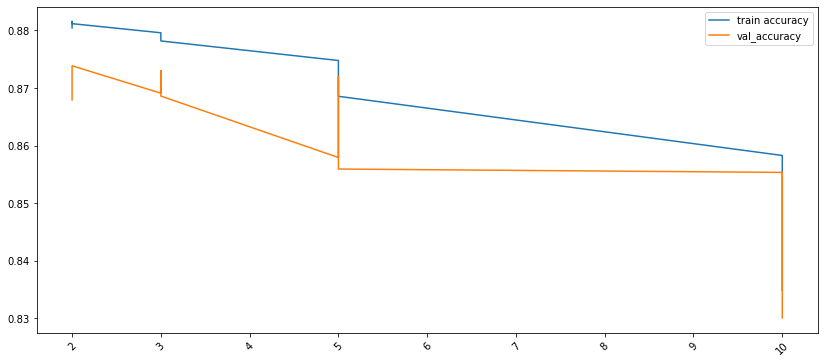

In [228]:
plt.figure(figsize=(14,6)) 
plt.plot(df_1b['no. layers'], df_1b['train accuracy'], label='train accuracy')
plt.plot(df_1b['no. layers'], df_1b['val_accuracy'], label='val_accuracy')
plt.xticks(rotation=45)
plt.legend();

**Вывод: Оптимальная настройка: 3 слоя/128 нейронов. дальнейшее увеличение слоев к улушению accuracy не привели.**

## 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [229]:
df_2 = pd.DataFrame(columns=['optimizer', 'train accuracy', 'val_accuracy'])

In [241]:
model = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(128, activation='tanh'),   
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

    # Train the model.
history= model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=5,
    batch_size=32, validation_split=0.2
)
    
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
    
df_2 = df_2.append({'optimizer': 'adam', 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)
    

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6006 - accuracy: 0.7848 - val_loss: 0.4315 - val_accuracy: 0.8398
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4019 - accuracy: 0.8544 - val_loss: 0.3999 - val_accuracy: 0.8557
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3590 - accuracy: 0.8672 - val_loss: 0.3684 - val_accuracy: 0.8677
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3396 - accuracy: 0.8733 - val_loss: 0.3924 - val_accuracy: 0.8537
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3289 - accuracy: 0.8798 - val_loss: 0.3734 - val_accuracy: 0.8616


In [243]:
model = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(128, activation='tanh'),   
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

    # Train the model.
history= model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=5,
    batch_size=32, validation_split=0.2
)
    
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
    
df_2 = df_2.append({'optimizer': 'SGD', 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8514 - accuracy: 0.7120 - val_loss: 0.4889 - val_accuracy: 0.8251
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4659 - accuracy: 0.8364 - val_loss: 0.4432 - val_accuracy: 0.8381
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4198 - accuracy: 0.8514 - val_loss: 0.4118 - val_accuracy: 0.8509
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3824 - accuracy: 0.8634 - val_loss: 0.3855 - val_accuracy: 0.8640
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3743 - accuracy: 0.8674 - val_loss: 0.3734 - val_accuracy: 0.8664


In [251]:
my_model = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(128, activation='tanh'),   
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
my_model.compile(
    optimizer='RMSProp',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

    # Train the model.
history= my_model.fit(  
    train_images[:,:],
    y_t[:,:],
    epochs=5,
    batch_size=32, validation_split=0.2
)
    
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
    
df_2 = df_2.append({'optimizer': 'RMSProp', 'train accuracy': train_acc, 'val_accuracy': val_acc}, ignore_index=True)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6314 - accuracy: 0.7707 - val_loss: 0.4936 - val_accuracy: 0.8200
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4043 - accuracy: 0.8540 - val_loss: 0.3808 - val_accuracy: 0.8644
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3566 - accuracy: 0.8695 - val_loss: 0.3679 - val_accuracy: 0.8684
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3344 - accuracy: 0.8759 - val_loss: 0.4035 - val_accuracy: 0.8511
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3177 - accuracy: 0.8862 - val_loss: 0.3444 - val_accuracy: 0.8742


In [252]:
df_2

,optimizer,train accuracy,val_accuracy
0,adam,0.877833,0.861583
1,SGD,0.869604,0.866417
2,RMSProp,0.884562,0.866500
3,RMSProp,0.885083,0.874167


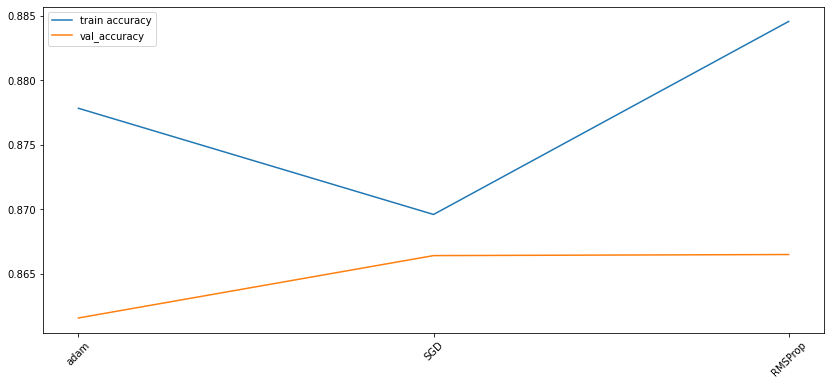

In [248]:
plt.figure(figsize=(14,6)) 
plt.plot(df_2['optimizer'], df_2['train accuracy'], label='train accuracy')
plt.plot(df_2['optimizer'], df_2['val_accuracy'], label='val_accuracy')
plt.xticks(rotation=45)
plt.legend();

**Вывод: Хуже себя показал оптимизатор Adam. 
         Разница между accuracy val и accuracy train на оптимизаторе SGD говорит о возможном            переобучении.
         Поэтому выбираю оптимизатор RMSProp.**
         
    

## 4. Для одного варианта сетей сформируйте матрицу ошибок по классам.

In [265]:
y_pred = my_model.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

In [266]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


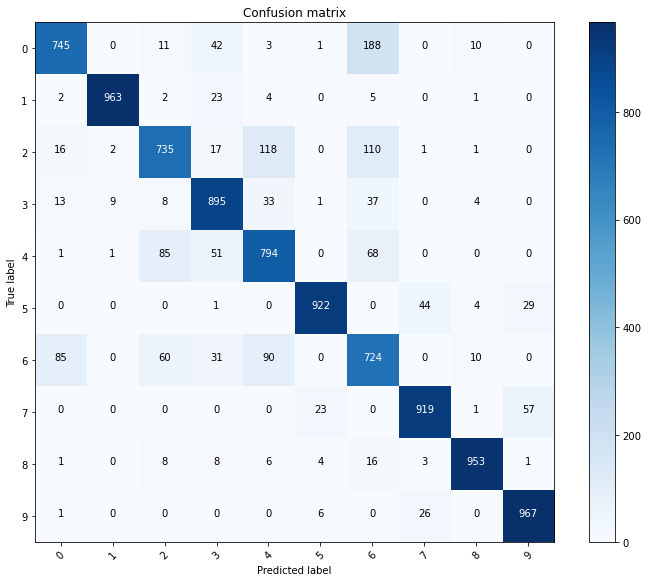

In [267]:
cnf_matrix = confusion_matrix(test_labels, y_pred_class)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title='Confusion matrix', normalize=False)
plt.show()

In [268]:
def get_precision_and_recall_from_confusion_matrix(label, cnf_matrix):
    str_sum = 0
    col_sum = 0
    for i in range(len(cnf_matrix)):
        str_sum += cnf_matrix[label][i]
        col_sum += cnf_matrix[i][label]
        
    return cnf_matrix[label][label] / str_sum, cnf_matrix[label][label] / col_sum

In [269]:
pr_rc_result = pd.DataFrame()
precisions = []
recalls = []
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for l in labels:
    p_r = get_precision_and_recall_from_confusion_matrix(l, cnf_matrix)
    precisions.append(p_r[0])
    recalls.append(p_r[1])
pr_rc_result['label'] = labels
pr_rc_result['precision'] = precisions
pr_rc_result['recall'] = recalls

pr_rc_result.sort_values(by='precision', ascending=False)

,label,precision,recall
9,9,0.967,0.917457
1,1,0.963,0.987692
8,8,0.953,0.968496
5,5,0.922,0.963427
7,7,0.919,0.925478
3,3,0.895,0.838015
4,4,0.794,0.757634
0,0,0.745,0.862269
2,2,0.735,0.808581
6,6,0.724,0.630662


In [270]:
pr_rc_result.sort_values(by='recall', ascending=False)

,label,precision,recall
1,1,0.963,0.987692
8,8,0.953,0.968496
5,5,0.922,0.963427
7,7,0.919,0.925478
9,9,0.967,0.917457
0,0,0.745,0.862269
3,3,0.895,0.838015
2,2,0.735,0.808581
4,4,0.794,0.757634
6,6,0.724,0.630662
